Copyright 2023 Andrew M. Olney, Dale Bowman, Tasha Sahr and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.

# Introduction

The transition from basic statistics to data science can seem overwhelming.
A significant part of the challenge is moving from traditional GUI-oriented programs like SPSS to programming-oriented environments.
This workshop reviews basic statistics in an advanced data science environment, [JupyterLab](https://jupyter.org/), using  blocks-based programming for the [R](https://www.r-project.org/) language.

To use this notebook effectively, you should use the [Blockly extension](https://github.com/aolney/jupyterlab-blockly-r-extension) we have developed.
With this extension, you will be able to write *R* code by connecting blocks together.
Blocks-based programming removes some of the burden of learning to program (memorizing syntax, syntax errors, etc) and allows users to focus on solving data science problems.

If you are not encountering this notebook in a live workshop, it is recommended that you watch this [short video tutorial](https://youtu.be/ovCJln08mG8?vq=hd720) or this [long video tutorial](https://youtu.be/-luPzplPDI0?vq=hd720) to see a demonstration, especially if you have never used a Jupyter notebook before.

Ready? Let's get started!

## What you will learn

This workshop will cover the following:

- Loading data
    - Importing a library
    - Reading a file
    - Making a variable
    - Selecting rows
    - Selecting columns
    - Checking column types
- Plotting
    - ggplot
    - Scatter plots
    - Bar plots
        - Long data format
    - Line plots
    - Histograms
- Descriptive statistics
    - Measures of central tendency
    - Measures of dispersion
    - Boxplots
    - All in one
- Measures of association

You can jump around in this notebook using the navigation pane.

<details>
    <summary>Basics: Navigation pane</summary>
    
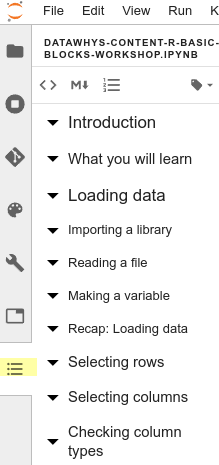
</details>

# Loading data

<details>
    <summary>Basics: Tabular data</summary>
    
The most common type of structured data is **tabular data** which is what you find in spreadsheets.
If you've ever used a spreadsheet, you know something about tabular data!

Here's an example of tabular data, with *height* in centimeters, *age* in years, and *weight* in kilograms:

| Height | Age | Weight |
|--------|-----|--------|
| 161    | 50  | 53     |
| 161    | 17  | 53     |
| 155    | 33  | 84     |
| 180    | 51  | 84     |
| 186    | 18  | 88     |

In tabular data like this, each **row** is a person.
More generically, we would say each row is an **observation** or **datapoint** (in statistics terminology) or an **item** (in machine learning terminology).
In each row, we have measurements for each of our variables for that particular person.
Since we have five rows of measurements, we know that there are five people in this dataset.

We can also think about tabular data in terms of **columns**.
Each column represents a variable, with the name of that variable in the **column header**.
For example, *height* is at the top of the first column and is the name of the variable for that column.
Importantly, the header is not an observation but rather a description of our data.
This is why we don't count the header when we are counting the rows in our data.
</details>

<details>
    <summary>Basics: Delimited tabular data</summary>

You are probably familiar with spreadsheet files, e.g. Microsoft Excel has files that end in `.xls` or `.xlsx`.
However, in data science, it is more common to have tabular data files that are **delimited**.
A delimited file is just a plain text file where column boundaries are represented by a specific character, usually a comma or a tab.

Here's an example of delimited tabular data, with *height* in centimeters, *age* in years, and *weight* in kilograms in **comma separated value (CSV)** form:

```
Height,Age,Weight
161,50,53
161,17,53
155,33,84
180,51,84
186,18,88
```

and here's what the data looks like in **tab separated value (TSV)** form:

```
Height	Age	Weight
161	50	53
161	17	53
155	33	84
180	51	84
186	18	88
```

The choice of the delimiter (comma, tab, or something else) is really arbitrary, but **it's always better to use a delimiter that doesn't appear in your data.**
</details>

First, let's read a CSV file into a dataframe.
A **dataframe** is variable that represents rows, columns, header, etc just like they are stored in a tabular data file.
To do that, we need to import a library called `readr`.
**If it isn't already open**, open up the Blockly extension.

<details>
    <summary>Basics: Open Blockly extension</summary>
    
Open up the Blockly extension by clicking on the painter's palette icon, then clicking on `Blockly R`.

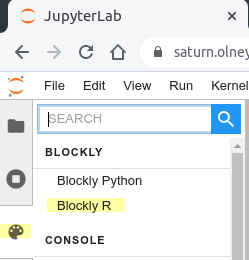
<details>

### Importing a library

Using the IMPORT menu in the Blockly palette, click on an import block `library some library`:

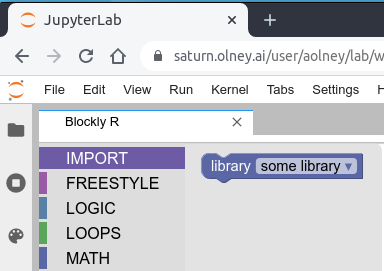

When you click on the block, it drops onto the Blockly workspace.
Click on the `some library` dropdown, choose `Rename variable...`, and type `readr` into the box that pops up.
This imports the *R* `readr` library and gives it the variable name, or alias, `readr`.

In the future, we will abbreviate these steps as:

- `library readr`

Make sure the code cell below is selected (has a blue bar next to it) and press the `Blocks to Code` button below the Blockly workspace.
This will insert the code corresponding to the blocks into the **active cell** in Jupyter, which is the cell that has a blue bar next to it.

Once the code appears in the Jupyter cell below, you must **execute** or **run** it by either pressing the &#9658; button at the top of the window or by pressing Shift + Enter on your keyboard.

In [4]:
library(readr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(cA1)X2lCPQio$W{:j4y">readr</variable></variables><block type="import_R" id="Gv_0#Q!yW+GN:NDyn9P/" x="16" y="10"><field name="libraryName" id="(cA1)X2lCPQio$W{:j4y">readr</field></block></xml>

### Reading a file

We can now do things with `readr`, like load datasets!

Our file is called `height-age-weight.csv` and it is in the `datasets` folder.
That means the **path** from this notebook (the one you're reading) to the data is `datasets/height-age-weight.csv`.

To read this file into a dataframe, we will use `readr`. 
Go to the VARIABLES menu in the Blockly palette and click on the `with readr do ...` block.

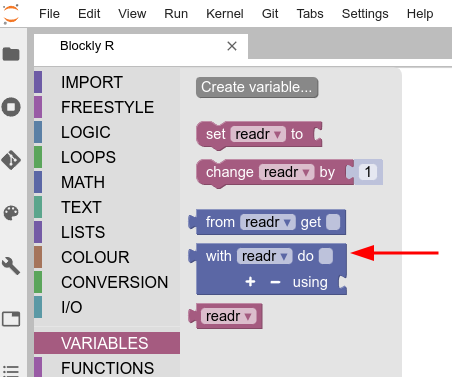

After it drops into the Blockly workspace, wait until the dropdown stops loading, and then click on it and select `read_csv`.
You can also start typing `read_csv` to narrow the dropdown to matching options.
Then get a `" "` block from TEXT, drop it on the workspace, drag it to the `using` part of the first block, and type the file path `datasets/height-age-weight.csv` into it.
Your blocks should look like this:

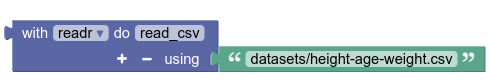

Make sure the cell below is selected, then press `Blocks to Codes`, and execute the cell to run the code by pressing the &#9658; button.

In the future, we will abbreviate these steps as:

- `with readr do read_csv using "datasets/height-age-weight.csv"`

*Note: the first time you use a library, it may take some time to load. You can see that R is working because the status bubble will be filled as shown below. When you load the library in the future, it will load instantly because we cache it.*

<!-- 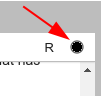 -->
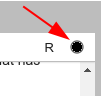

In [5]:
readr::read_csv("datasets/height-age-weight.csv")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(cA1)X2lCPQio$W{:j4y">readr</variable></variables><block type="varDoMethod_R" id="!AFB9x,(K:Q.,_2FYY+u" x="8" y="176"><mutation items="1"></mutation><field name="VAR" id="(cA1)X2lCPQio$W{:j4y">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="]^)Tk(d-R3[)=xBi|9=?"><field name="TEXT">datasets/height-age-weight.csv</field></block></value></block></xml>

Rows: 5 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Height, Age, Weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Height,Age,Weight
<dbl>,<dbl>,<dbl>
161,50,53
161,17,53
155,33,84
180,51,84
186,18,88


When you run the cell, it will display some information and then the dataframe directly below it.
This is one of the nice things about Jupyter - **it will display the output of the last line of code in a cell**, even if the output is text, a table, or a plot.

### Making a variable

Right now, we haven't actually stored the dataframe anywhere.
We used `readr` to read the csv file, and then Jupyter output that so we could see it.
But if we wanted to do anything with the dataframe, we'd have to read the file again.

Instead of reading the file every time we want to access the data, we can **store it in a variable**.
In other words, we will create a variable and set it to be the dataframe we created from the file.

Using VARIABLES menu in the Blockly palette, click on `Create variable...` and type `dataframe` into the pop up window.
Then click on the `set dataframe to` block so that your blocks below look like this:

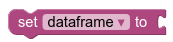

Then go get the same blocks you used before to read the file and connect them to the `set dataframe to` block.
You can do this from scratch or you can use the following procedure:

- Click the code cell below and press `Blocks to Code` to save your intermediate work (the `set dataframe to` block)
- Go back to the previous cell, click on the block you want, and copy it using Ctrl+c
- Click on the code cell below to select it, click the Blockly workspace, and paste the block using Ctrl+v

*Tip: If you don't save your intermediate work, you'll lose it because `Notebook Sync` will clear the Blockly workspace when it loads the blocks in the previous cell.*

After you've added the blocks to read the dataframe, drop a variable block for `dataframe` underneath it to display the dataframe.
The result should look like this:

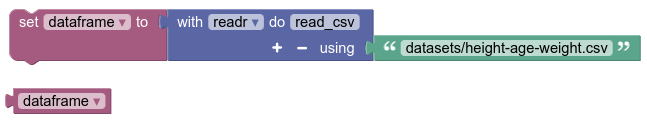

In the future, we will abbreviate these steps as:

- Create `dataframe` and set it to `with readr do read_csv using "datasets/height-age-weight.csv"`
- `dataframe`

As always, you need to hit the &#9658; button or press Shift + Enter to run the code.

In [9]:
dataframe = readr::read_csv("datasets/height-age-weight.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable><variable id="(cA1)X2lCPQio$W{:j4y">readr</variable></variables><block type="variables_set" id="aEmL:SB)NF-^e4,:*KEN" x="17" y="204"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id="!AFB9x,(K:Q.,_2FYY+u"><mutation items="1"></mutation><field name="VAR" id="(cA1)X2lCPQio$W{:j4y">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="]^)Tk(d-R3[)=xBi|9=?"><field name="TEXT">datasets/height-age-weight.csv</field></block></value></block></value></block><block type="variables_get" id="3?lrwsCvbw.I,.6Ab_k/" x="13" y="283"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></xml>

Rows: 5 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Height, Age, Weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Height,Age,Weight
<dbl>,<dbl>,<dbl>
161,50,53
161,17,53
155,33,84
180,51,84
186,18,88


You should see the same output as before - the only difference is that we've read the csv and stored the data into the `dataframe` block, so we will use the `dataframe` block whenever we want to work with the data.

### Recap: Loading data

When you want to load data in the future, simply do the following:

- library `readr` *(loads the library)*
- Set `dataframe` to with `readr` do `read_csv` using `your data file name` *(loads the dataframe)*
- `dataframe` *(displays the dataframe)*

## Selecting rows

There are many things we can do with dataframes.
One thing we can do is get specific rows, which are our datapoints.
We can manipulate dataframes easily using another library called `dplyr`, so let's load it first:

- `library dplyr`

*Then &#9658; or Shift + Enter*

In [6]:
library(dplyr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="LiPrc==C!jd{;fWA-(}6">dplyr</variable></variables><block type="import_R" id="K.nY/JzUnFt!B~)xw=j7" x="16" y="10"><field name="libraryName" id="LiPrc==C!jd{;fWA-(}6">dplyr</field></block></xml>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Don't worry too much about the messages displayed pink at this point.

Let's get the first row of the dataframe.
We can do that using the `slice` function:

- with `dplyr` do `slice` using `dataframe` and `1` 

To get an extra slot for `1`, use the `+` button on the block.
You can get a `1` block by getting a number block `123` from MATH  changing the value of the number block to `1`.

Your blocks should look like this:

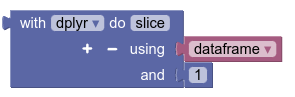

*Make sure the code cell below is selected, then &#9658; or Shift + Enter*

In [10]:
dplyr::slice(dataframe,1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="LiPrc==C!jd{;fWA-(}6">dplyr</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varDoMethod_R" id="$|@c}XUhYyE.FtSAhaE%" x="8" y="176"><mutation items="2"></mutation><field name="VAR" id="LiPrc==C!jd{;fWA-(}6">dplyr</field><field name="MEMBER">slice</field><data>dplyr:slice</data><value name="ADD0"><block type="variables_get" id="0^vw_mn4A5MRT%xD%Qm("><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value><value name="ADD1"><block type="math_number" id="pGinSCPehnw}2-.2Rr-S"><field name="NUM">1</field></block></value></block></xml>

Height,Age,Weight
<dbl>,<dbl>,<dbl>
161,50,53


As you can see, the output is only the first row of the dataframe.

Try it again (i.e. copy the blocks, select the cell below, and paste the blocks in the Blockly workspace), but this time, change the `1` to a `1:2`.

To make a `1:2` block, use a block from the `FREESTYLE` category.
You can read `1:2` as "from 1 to 2".

- with `dplyr` do `slice` using `dataframe` and `1:2` 

*Then &#9658; or Shift + Enter*

In [11]:
dplyr::slice(dataframe,1:2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="LiPrc==C!jd{;fWA-(}6">dplyr</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varDoMethod_R" id="$|@c}XUhYyE.FtSAhaE%" x="8" y="176"><mutation items="2"></mutation><field name="VAR" id="LiPrc==C!jd{;fWA-(}6">dplyr</field><field name="MEMBER">slice</field><data>dplyr:slice</data><value name="ADD0"><block type="variables_get" id="0^vw_mn4A5MRT%xD%Qm("><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="O?ev4Bf5{{xYFXU=Cc_Y"><field name="CODE">1:2</field></block></value></block></xml>

Height,Age,Weight
<dbl>,<dbl>,<dbl>
161,50,53
161,17,53


Now the output is the first two rows of the dataframe.
We could get arbitrary rows of the dataframe by starting at a different number and ending at a different number.

## Selecting columns

Similarly, we can get a column of the dataframe by using the name of that column in a freestyle block.
The name must **exactly** match the spelling and case of the column:

- with `dplyr` do `select` using `dataframe` and `Height` 

And run it.

In [12]:
dplyr::select(dataframe,Height)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="LiPrc==C!jd{;fWA-(}6">dplyr</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varDoMethod_R" id="eGwb`#8yU[:`w{muZddM" x="8" y="176"><mutation items="2"></mutation><field name="VAR" id="LiPrc==C!jd{;fWA-(}6">dplyr</field><field name="MEMBER">select</field><data>dplyr:select</data><value name="ADD0"><block type="variables_get" id="k(}Ej}(Zx@:mO9D!9z~#"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="BOQ$uM/td%JJik~_Lc(X"><field name="CODE">Height</field></block></value></block></xml>

Height
<dbl>
161
161
155
180
186


Just like before when we got more than one row, we can get more than one column:

- with `dplyr` do `select` using `dataframe` and `Height:Age`

And run the cell (try Shift + Enter if you haven't tried it yet).

In [13]:
dplyr::select(dataframe,Height:Age)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="LiPrc==C!jd{;fWA-(}6">dplyr</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varDoMethod_R" id="eGwb`#8yU[:`w{muZddM" x="8" y="176"><mutation items="2"></mutation><field name="VAR" id="LiPrc==C!jd{;fWA-(}6">dplyr</field><field name="MEMBER">select</field><data>dplyr:select</data><value name="ADD0"><block type="variables_get" id="k(}Ej}(Zx@:mO9D!9z~#"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="BOQ$uM/td%JJik~_Lc(X"><field name="CODE">Height:Age</field></block></value></block></xml>

Height,Age
<dbl>,<dbl>
161,50
161,17
155,33
180,51
186,18


If instead of a range of columns, we wanted a column here and a column there, we could instead use `and` to give the names of the columns we want.

To recap, dataframes are both lists of rows and lists of columns.
Whether we treat a dataframe as a list of rows or list of columns depends on what we want to do.
If we want to select datapoints (observations), then we treat it as a list of rows, because each row is a datapoint.
In our dataset above, this would be like selecting the people in the dataset we want to analyze, since each row is a person.
In contrast, if we want to select variables, then we treat the dataframe like a list of columns.

## Checking column types

There are four different kinds of variables: nominal, ordinal, interval, and ratio.
These are really important to know, because many kinds of analysis are only valid on particular types of variable.

<details>
    <summary>Basics: Types of variables</summary>
    
Structured data begins with **measurements** of some type of thing in the real world, which we call a **variable**.
Let's return to the example of height. 
I may measure 10 people and find that their heights in centimeters are:

| Height |
|--------|
| 165    |
| 188    |
| 153    |
| 164    |
| 150    |
| 190    |
| 169    |
| 163    |
| 165    |
| 190    |

Each of these values (e.g. 165) is a measurement of the variable *height*.
We call *height* a variable because its value isn't constant.
If everyone in the world were the same height, we wouldn't call height a variable, and we also wouldn't bother measuring it, because we'd know everyone is the same.

Variables have different **types** that can affect your analysis.

### Nominal

A nominal variable consists of unordered categories, like *male* or *female* for biological sex.
Notice that these categories are not numbers, and there is no order to the categories.
We do not say that male comes before female or is smaller than female.

### Ordinal

Ordinal variables consist of ordered categories.
You can think of it as nominal data but with an ordering from first to last or smallest to largest.
A common example of ordinal data are Likert questions like:

```
(1) Strongly disagree
(2) Disagree
(3) Neither agree nor disagree
(4) Agree
(5) Strongly agree
```

Even though these options are numbered 1 to 5, those numbers only indicate which comes before the others, not how "big" an option is.
For example, we wouldn't say that the difference between *Agree*  and *Disagree* is the same as the difference between *Neither agree nor disagree* and *Strongly agree*.

### Interval

Interval variables are ordered *and* their measurement scales are evenly spaced.
A classic example is temperature in Fahrenheit.
In degrees Fahrenheit, the difference between 70 and 71 is the same as the difference between 90 and 91 - either case is one degree.
The other most important characteristic of interval variables is also the most confusing one, which is that interval variables don't have a meaningful zero value.
Degrees Fahrenheit is an example of this because there's nothing special about 0 degrees. 
0 degrees doesn't mean there's no temperature or no heat energy, it's just an arbitrary point on the scale.

### Ratio

Ratio variables are like interval variables but with meaningful zeros.
Age and height are good examples because 0 age means you have no age, and 0 height means you have no height.
The name *ratio* reflects that you can form a ratio with these variables, which means that you can say age 20 is twice as old as age 10.
Notice you can't say that about degrees Fahrenheit: 100 degrees is not really twice as hot as 50 degrees, because 0 degrees Fahrenheit doesn't mean "no temperature."
    
</details>

Does `readr` take care of this for us?
Let's find out!
We can use the `spec` function to give us the specifications of the dataframe:

- with `readr` do `spec` using `dataframe`

And run it.

In [20]:
readr::spec(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(cA1)X2lCPQio$W{:j4y">readr</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varDoMethod_R" id="NBbE2M,V(Js`SQt{!7A6" x="-77" y="164"><mutation items="1"></mutation><field name="VAR" id="(cA1)X2lCPQio$W{:j4y">readr</field><field name="MEMBER">spec</field><data>readr:spec</data><value name="ADD0"><block type="variables_get" id="{sNlqY/W($*30Q^l00O@"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value></block></xml>

cols(
  Height = col_double(),
  Age = col_double(),
  Weight = col_double()
)

The output tells us the **data type** of each variable, in this case `double`
This is just one way the computer can store information.
Some of the common ways are:

- logical: TRUE or FALSE
- integer: an integer (no decimal)
- double: a floating point value (has decimal)
- character: a text string
- factor: a nominal value
- ordered: an ordinal value

As you can see, data types don't line up exactly with nominal, ordinal, interval, and ratio types of variables.
Additionally, when you read in a file, `readr` will guess the types of each column based on the values in your file.

**`readr` will never guess factor or ordered.**
Instead, `readr` will interpret either of these as `character`, so if you want a column to be nominal or ordinal, you have to give `readr` special instructions.

There's no explicit representation of ratio or interval either. 
These could both be mapped to integer or double.
What this means in practice is that we have to be vigilant and keep track of the type of variable ourselves, because `readr` won't automatically do it for us.
That means by default `readr` will let us do things with our data that don't make sense, so watch out!

## Practice

For extended practice, you can try [this notebook](extended-practice/Data-science-and-the-nature-of-data-PS.ipynb) (will open in a new tab).

# Plotting

Data visualization is the discipline of trying to understand data by using graphic context so patterns, trends, and correlations that might not otherwise be detected can be exposed.

Data visualization is an important tool to understand data.

Charts, plots, graphs, and maps (and many more) are all types of data visualizations. 

There are many facets involved in data visualization; this tutorial is just the introduction in your R plotting journey. 

Today we will focus on the most often used plots:

- Scatter plots
- Bar plots
- Line plots
- Histograms

**Each type of plot requires a specific type of data and has a specific purpose.**

## ggplot2

In R, there are many options for visualizing data and is often challenging to choose which library to use. 

For the purpose of this tutorial, we will focus on understanding, programming, and interpreting plots from `ggplot2`.

To use `ggplot2`, 

- `library ggplot2`

**Make sure you run the cell using the &#9658; button or Shift + Enter**

In [14]:
library(ggplot2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable></variables><block type="import_R" id="g|H6K-US,s(m!PaY_gg9" x="16" y="10"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field></block></xml>

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”


## Load data

We'll use the classic `iris` dataset to illustrate some plots.

The `iris` dataset contains 5 variables describing iris flowers:

| Variable    | Type    | Description           |
|:-------------|:---------|:-----------------------|
| SepalLength | Ratio   | the sepal length (cm) |
| SepalWidth  | Ratio   | the sepal width (cm)  |
| PetalLength | Ratio   | the petal length (cm) |
| PetalWidth  | Ratio   | the petal width (cm)  |
| Species     | Nominal | the flower species    |

<div style="text-align:center;font-size: smaller">
 <b>Source:</b> This dataset was taken from the <a href="https://archive.ics.uci.edu/ml/datasets/iris">UCI Machine Learning Repository library
    </a></div>
<br>


In order to plot, we need to load the data into a dataframe, so the first step is to import the file reading library, `readr`:

- `library readr`

**Note: you only need to load a library once in a session, so you may not need to load `readr` again.**

In [15]:
library(readr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(cA1)X2lCPQio$W{:j4y">readr</variable></variables><block type="import_R" id="Gv_0#Q!yW+GN:NDyn9P/" x="16" y="10"><field name="libraryName" id="(cA1)X2lCPQio$W{:j4y">readr</field></block></xml>

Now we can read the dataset into the dataframe

- Set `dataframe` to with `readr` do `read_csv` using `datasets/iris.csv`
- Place a `dataframe` block below it in order to display the dataframe

**Remember the `with ... do` block is in VARIABLES**

In [16]:
dataframe = readr::read_csv("datasets/iris.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable><variable id="(cA1)X2lCPQio$W{:j4y">readr</variable></variables><block type="variables_set" id="aEmL:SB)NF-^e4,:*KEN" x="17" y="204"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id="!AFB9x,(K:Q.,_2FYY+u"><mutation items="1"></mutation><field name="VAR" id="(cA1)X2lCPQio$W{:j4y">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="]^)Tk(d-R3[)=xBi|9=?"><field name="TEXT">datasets/iris.csv</field></block></value></block></value></block><block type="variables_get" id="3?lrwsCvbw.I,.6Ab_k/" x="13" y="283"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></xml>

Rows: 150 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Species
dbl (4): SepalLength, SepalWidth, PetalLength, PetalWidth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SepalLength,SepalWidth,PetalLength,PetalWidth,Species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
⋮,⋮,⋮,⋮,⋮
6.8,3.2,5.9,2.3,virginica


We can see there are 150 rows in this dataset.
Each row is a datapoint (also called an observation).

When we plot the data, we will typically use all the datapoints, but we typically only use 1-2 variables (i.e. columns).

Each plot allows us to look at properties of a variable or relationships between variables.

In a dataset with as many variables as `iris`, we would expect to do many plots if we wanted to explore all of these relationships.

## Scatter Plots

Scatter plots are one of the most basic and useful plots for looking at the relationship between two variables.

Scatterplots:

- Require each variable to be on an interval or ratio scale
- Show each datapoint

A simple scatter plot in `ggplot2` is defined by four things:

- the dataframe
- the x (or independent) variable
- the y (or dependent) variable
- the marker used for points

Let's continue this example with actual code.
We'll use a new block under `SPECIAL` that is unique to `ggplot2`, the `make plot` block:

- make plot 
    - `ggplot2` do `ggplot`
        - using `dataframe`
        - and `aes(x=SepalWidth, y=SepalLength)` *(hint: this is a freestyle block)*
    - with 
        - with `ggplot2` do `geom_point`
        
Here's what it should look like.
Note the correspondence between the nesting in the description above and the blocks:

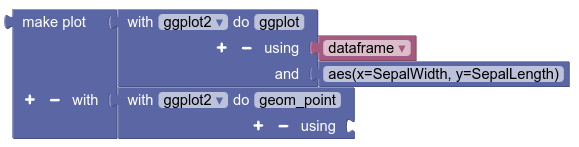

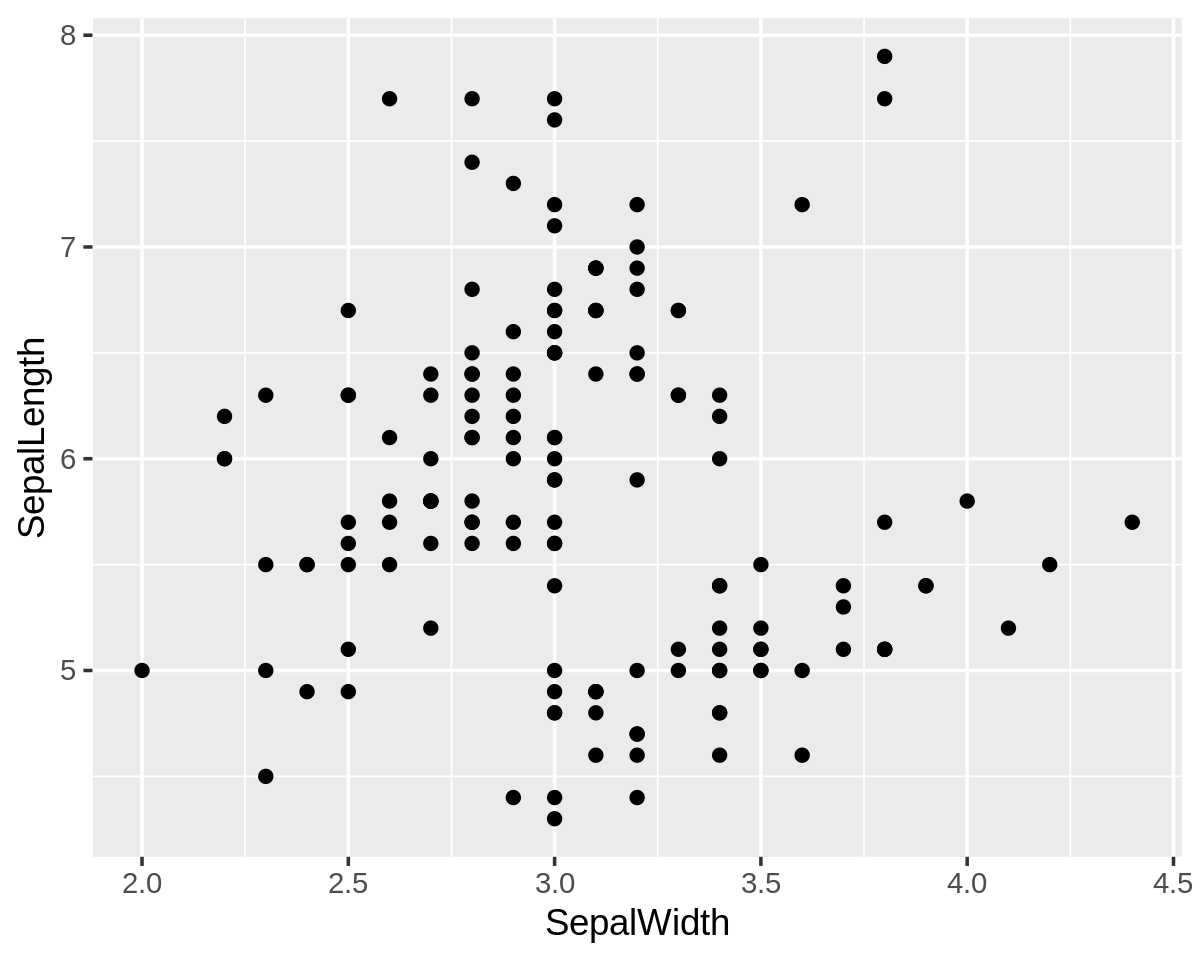

In [17]:
ggplot2::ggplot(dataframe,aes(x=SepalWidth, y=SepalLength)) +
    ggplot2::geom_point()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="ggplot_plus_R" id="TGEN;JR7XrLBEIFe~u;F" x="-49" y="109"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="s$Aa#z^bfxQ]I|$aqxkB"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="k8cxEeQDUlvzny5TMcSa"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R5)9uH[M?{qTsc(g*EC9"><field name="CODE">aes(x=SepalWidth, y=SepalLength)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="?c8)3RrgU,tKM=z(B}3!"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_point</field><data>ggplot2:geom_point</data></block></value></block></xml>

From this plot, it looks like perhaps sepal width and sepal length increase together, because you can imagine a diagonal line going from the bottom left to the top right through the datapoints.

However, it also appears like there might be two groups of datapoints, and upper and a lower group.

Let's make some tweaks to this plot to illustrate some of what is possible in plots.

Copy the block for the plot above using the following steps:

- Click on the code cell
- Click on the block that appears
- Press Ctrl-C to copy
- Click on the empty code cell below
- Press Ctrl-V to paste
- Click "Blocks to Code" to save your blocks in the code cell

Once you have copied the block, do the following

1. Add `color=Species` to the `aes` block just after `y=SepalLenth` (don't forget the comma in between)
2. Add a slot to `make plot` and in that slot put
- with `ggplot2` do `labs` with `title="Relationship between Sepal Length and Sepal Width"`

Together, this will color the points by species and give the plot a title.

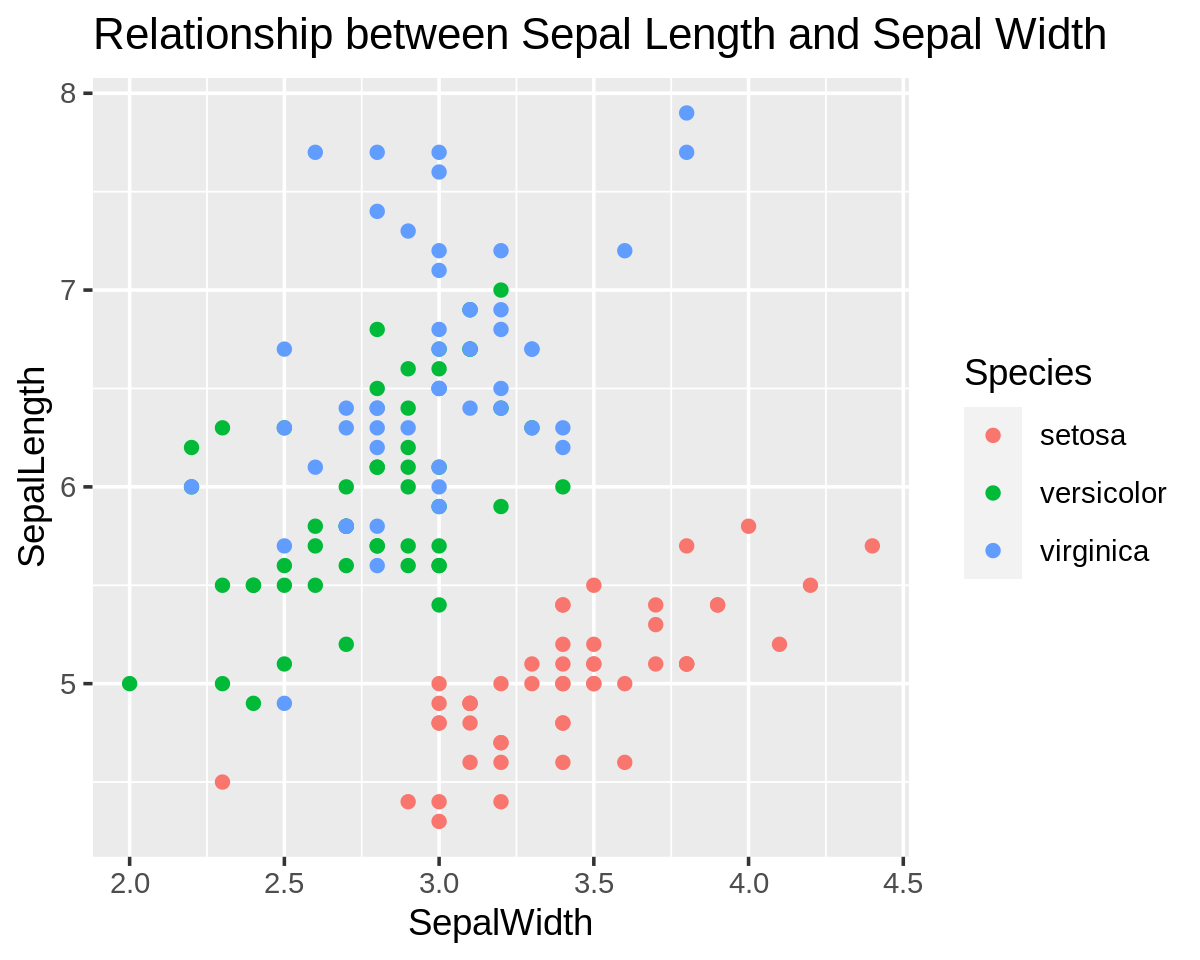

In [18]:
ggplot2::ggplot(dataframe,aes(x=SepalWidth, y=SepalLength, color=Species)) +
    ggplot2::geom_point() +
    ggplot2::labs(title="Relationship between Sepal Length and Sepal Width")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="ggplot_plus_R" id="TGEN;JR7XrLBEIFe~u;F" x="-49" y="109"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="s$Aa#z^bfxQ]I|$aqxkB"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="k8cxEeQDUlvzny5TMcSa"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R5)9uH[M?{qTsc(g*EC9"><field name="CODE">aes(x=SepalWidth, y=SepalLength, color=Species)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="?c8)3RrgU,tKM=z(B}3!"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_point</field><data>ggplot2:geom_point</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="oD9,}z%,gACrZ,P#~T#3"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">labs</field><data>ggplot2:labs</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id=":[P(V)Km,b4pXHu;:^HW"><field name="CODE">title="Relationship between Sepal Length and Sepal Width"</field></block></value></block></value></block></xml>

The title that we have added is just one example of how plots can be annotated with descriptive text.
We could use custom labels for our x/y variables as well, e.g. "Sepal Width (cm)".

The color component we added is more interesting and gives us a clearer view into the data.
We can now clearly see three groups corresponding to the three species of iris:

- Versicolor and virginica are very similar in terms of their relationship between sepal width and length
- Setosa is distinctly different from these other two species

It's worth stressing that we now have three variables represented in the scatterplot: sepal width, sepal length, and species.
While sepal width and length are represented by position on the x and y axes, species is represented by color.
Color works well for species because it is a categorical variable.

This example just scratches the surface of [what is possible with scatterplots in ggplot2](http://www.sthda.com/english/wiki/ggplot2-scatter-plots-quick-start-guide-r-software-and-data-visualization).

## Bar plots

Bar plots are very commonly used in both science and the business world.

Bar plots:

- Require the x to be discrete values
- Require the y to be a single number per x
- Are best for showing summary values like averages

In other words, while scatterplots show all the datapoints, bar plots only show a **summary value of y** for each x.

Let's make a bar plot using the average, or `mean` of the variables as a summary value.

Since the mean isn't in the dataframe, we need to calculate it somehow.
The easiest way is to reshape our dataframe so that `ggplot` can calculate the mean internally.

### Long format

We'll make a new dataframe where each of the measurement variables is put in the same two columns.
This style of dataframe is called **long format**.

Start by importing the library we need to reshape:

- `library tidyr`

In [19]:
library(tidyr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="XxDURHz6QPK@1*~gXTIg">tidyr</variable></variables><block type="import_R" id="+#||8DR_Zkzh]Z[E%*Sz" x="-157" y="10"><field name="libraryName" id="XxDURHz6QPK@1*~gXTIg">tidyr</field></block></xml>

Now make a new, long dataframe selecting the measurement variables:

- Set `long` to with `tidyr` do `pivot_longer` using
    - `dataframe`
    - `cols=SepalLength:PetalWidth`
    - `values_to="cm"`
    - `names_to="variable"`
- `long` (to display)

**Look at the names of the columns in `long` to see how we've named them in the code above.**

In [20]:
long = tidyr::pivot_longer(dataframe,cols=SepalLength:PetalWidth,values_to="cm",names_to="variable")

long

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="@1x1nwzWN@%Z%C}2(F0v">long</variable><variable id="XxDURHz6QPK@1*~gXTIg">tidyr</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="variables_set" id="CYx+300C-7?.)U^N+@gI" x="-165" y="204"><field name="VAR" id="@1x1nwzWN@%Z%C}2(F0v">long</field><value name="VALUE"><block type="varDoMethod_R" id="`T84mYTplNi^[P5|vfPq"><mutation items="4"></mutation><field name="VAR" id="XxDURHz6QPK@1*~gXTIg">tidyr</field><field name="MEMBER">pivot_longer</field><data>tidyr:pivot_longer</data><value name="ADD0"><block type="variables_get" id="hXcjKesC6H!)[-.hn5{j"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="ONS8Vn+7J@KFz}iiq5C,"><field name="CODE">cols=SepalLength:PetalWidth</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id=")vM5S%hOtNYK9Dh6Vu$w"><field name="CODE">values_to="cm"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_R" id="du:Wm3r9/p4!p=X2qTnC"><field name="CODE">names_to="variable"</field></block></value></block></value></block><block type="variables_get" id="3)U[cXiD@KOylEr#PJp%" x="-165" y="338"><field name="VAR" id="@1x1nwzWN@%Z%C}2(F0v">long</field></block></xml>

Species,variable,cm
<chr>,<chr>,<dbl>
setosa,SepalLength,5.1
setosa,SepalWidth,3.5
setosa,PetalLength,1.4
setosa,PetalWidth,0.2
setosa,SepalLength,4.9
setosa,SepalWidth,3.0
setosa,PetalLength,1.4
⋮,⋮,⋮
virginica,SepalWidth,3.4


We can now use an internal function to `ggplot2` called `stat_summary` to calculate the means of each variable for us:

- make plot 
    - `ggplot2` do `ggplot`
        - using `long`
        - and `aes(x=variable,y=cm)`
    - with 
        - with `ggplot2` do `geom_bar`
            - using `stat = summary`
            - and `fun = "mean"`
            
This will draw a bar plot with `variable` on the x-axis and `cm` on the y-axis, using a summarized (mean) version of the data.

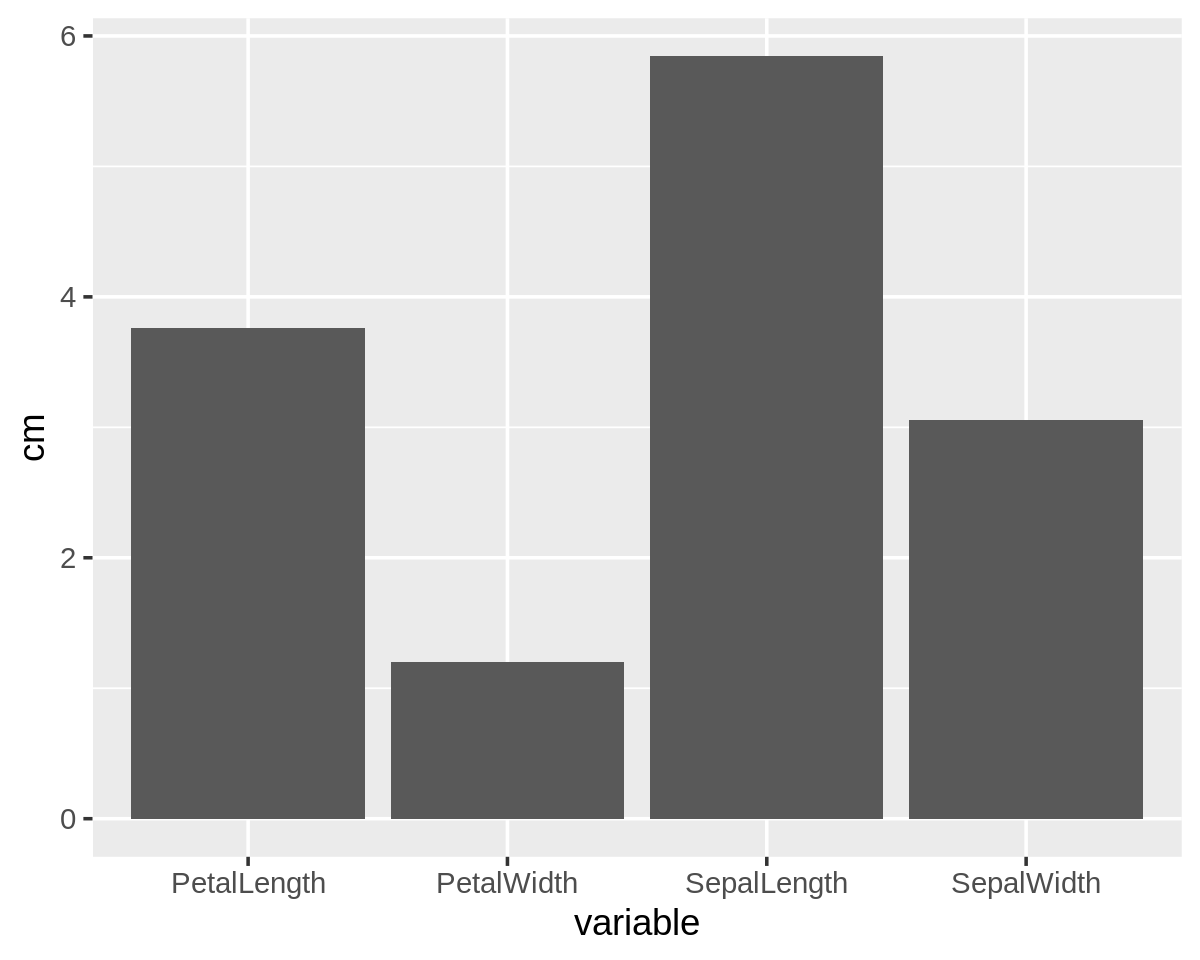

In [21]:
ggplot2::ggplot(long,aes(x=variable,y=cm)) +
    ggplot2::geom_bar(stat = "summary",fun = "mean")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="@1x1nwzWN@%Z%C}2(F0v">long</variable></variables><block type="ggplot_plus_R" id="TGEN;JR7XrLBEIFe~u;F" x="-49" y="109"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="s$Aa#z^bfxQ]I|$aqxkB"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="k8cxEeQDUlvzny5TMcSa"><field name="VAR" id="@1x1nwzWN@%Z%C}2(F0v">long</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R5)9uH[M?{qTsc(g*EC9"><field name="CODE">aes(x=variable,y=cm)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="?c8)3RrgU,tKM=z(B}3!"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_bar</field><data>ggplot2:geom_bar</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="T*:g0.U`rIP]gfPWJ1.w"><field name="CODE">stat = "summary"</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="0zm`bk*_(buiW(/FH?uu"><field name="CODE">fun = "mean"</field></block></value></block></value></block></xml>

While this usage of a bar plot is interesting, we can do something even better: group datapoints by species and compute the barplot with the groups.

Copy the code above and add `fill=Species` to the aesthetics (`aes`) and add `postion="dodge"` to `geom_bar`.
If you don't use "dodge", you'll get stacked bars instead of side by side bars.

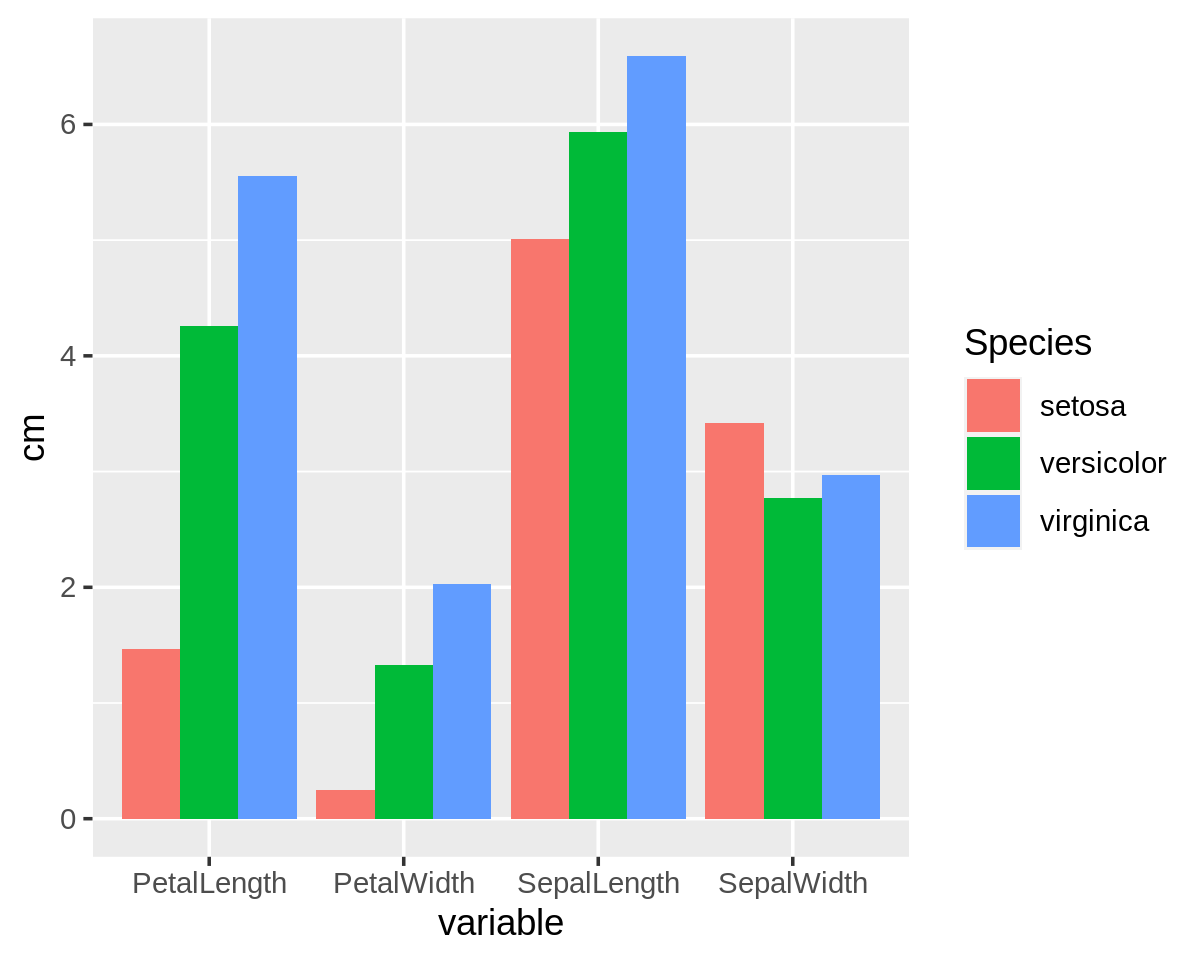

In [22]:
ggplot2::ggplot(long,aes(x=variable,y=cm,fill=Species)) +
    ggplot2::geom_bar(stat = "summary",fun = "mean",position=position_dodge())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="@1x1nwzWN@%Z%C}2(F0v">long</variable></variables><block type="ggplot_plus_R" id="TGEN;JR7XrLBEIFe~u;F" x="-49" y="109"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="s$Aa#z^bfxQ]I|$aqxkB"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="k8cxEeQDUlvzny5TMcSa"><field name="VAR" id="@1x1nwzWN@%Z%C}2(F0v">long</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R5)9uH[M?{qTsc(g*EC9"><field name="CODE">aes(x=variable,y=cm,fill=Species)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="?c8)3RrgU,tKM=z(B}3!"><mutation items="3"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_bar</field><data>ggplot2:geom_bar</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="T*:g0.U`rIP]gfPWJ1.w"><field name="CODE">stat = "summary"</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="0zm`bk*_(buiW(/FH?uu"><field name="CODE">fun = "mean"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="ZKnkH9n/:j!]}K6iu*O%"><field name="CODE">position=position_dodge()</field></block></value></block></value></block></xml>

The plot very nicely shows how all variables increase across species except `SepalWidth`.

## Line plots

Line plots are virtually identical to bar plots in usage because they:

- Require the x to be discrete values
- Require the y to be a single number per x
- Are best for showing summary values like averages

However, line plots, unlike bar plots, have the advantage that you can show multiple **sets** of lines at once.
In a bar plot, these would be overlapping, and patterns would be potentially difficult to see.

Making a line plot is very similar to a bar plot. 
Note the small changes in the code relative to what you just did:

- make plot 
    - `ggplot2` do `ggplot`
        - using `long`
        - and `aes(x=Species,y=cm,group=variable,color=variable)`
    - with 
        - with `ggplot2` do `geom_line`
            - using `stat = summary`
            - and `fun = "mean"`
       

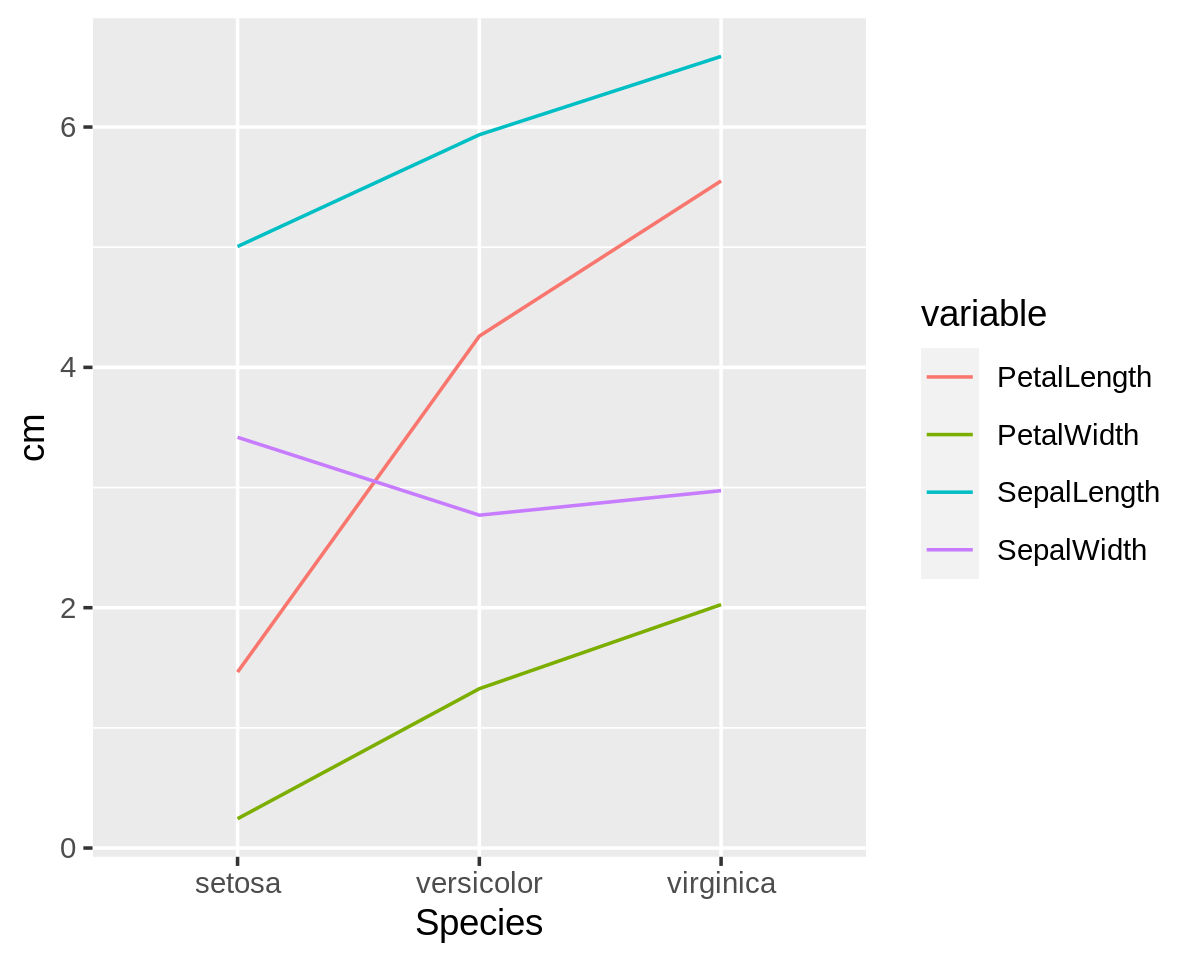

In [23]:
ggplot2::ggplot(long,aes(x=Species,y=cm,fill=Species,group=variable,color=variable)) +
    ggplot2::geom_line(stat = "summary",fun = "mean")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="@1x1nwzWN@%Z%C}2(F0v">long</variable></variables><block type="ggplot_plus_R" id="TGEN;JR7XrLBEIFe~u;F" x="-49" y="109"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="s$Aa#z^bfxQ]I|$aqxkB"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="k8cxEeQDUlvzny5TMcSa"><field name="VAR" id="@1x1nwzWN@%Z%C}2(F0v">long</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R5)9uH[M?{qTsc(g*EC9"><field name="CODE">aes(x=Species,y=cm,fill=Species,group=variable,color=variable)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="?c8)3RrgU,tKM=z(B}3!"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_line</field><data>ggplot2:geom_line</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="T*:g0.U`rIP]gfPWJ1.w"><field name="CODE">stat = "summary"</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="0zm`bk*_(buiW(/FH?uu"><field name="CODE">fun = "mean"</field></block></value></block></value></block></xml>

Here `ggplot2` nicely draws each variable in its own color, so we can see that all variables except `SepalWidth` seem to increase across species.

There are two important points to make here:

- Normally in line plots, the x axis is an ordered variable, like year. With a nominal variable like `Species`, we are fortunate to get such nice lines and not "spaghetti."

- Drawing multiple lines at once on one plot only makes sense if the variables have the same units of measurement, here centimeters. Otherwise the plot can mislead anyone not looking closely at the y axis.

## Histograms

Histograms introduce a new idea, **probability distributions**, into the discussion.
A probability distribution is simply a table listing the probability that a variable will have a particular value.

In our work, you can think in terms of **count distributions** or the number of times a variable has a particular value.
We will use the term **distribution** to refer to either count or probability distributions interchangeably. 

There are as many different types of distributions - as many as different types of animals in the zoo!
For our purposes, we highlight five general shapes of distributions:

- **Uniform:** a flat distribution where every value is equally likely
- **Normal:** a bell curve distribution where values toward the middle are most likely
- **Skewed right:** a declining distribution were small values are likely and large values unlikely
- **Skewed left:** the opposite of skewed right
- **Mixtures:** appear as two or more of the above distributions

The purpose of generating histograms is to visually determine the approximate distribution of a variable. 
Histograms can reveal extreme values, missing ranges, or skew, that may require special care in later analysis.

Histograms:

- Require x 
- Automatically determine bar widths for x
- Automatically define y as the count of values for x
- Are used to show the distribution of a **single** variable

Let's look at a numeric example.

- make plot 
    - `ggplot2` do `ggplot`
        - using `dataframe`
        - and `aes(x=Species)`
    - with 
        - with `ggplot2` do `geom_histogram`      

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


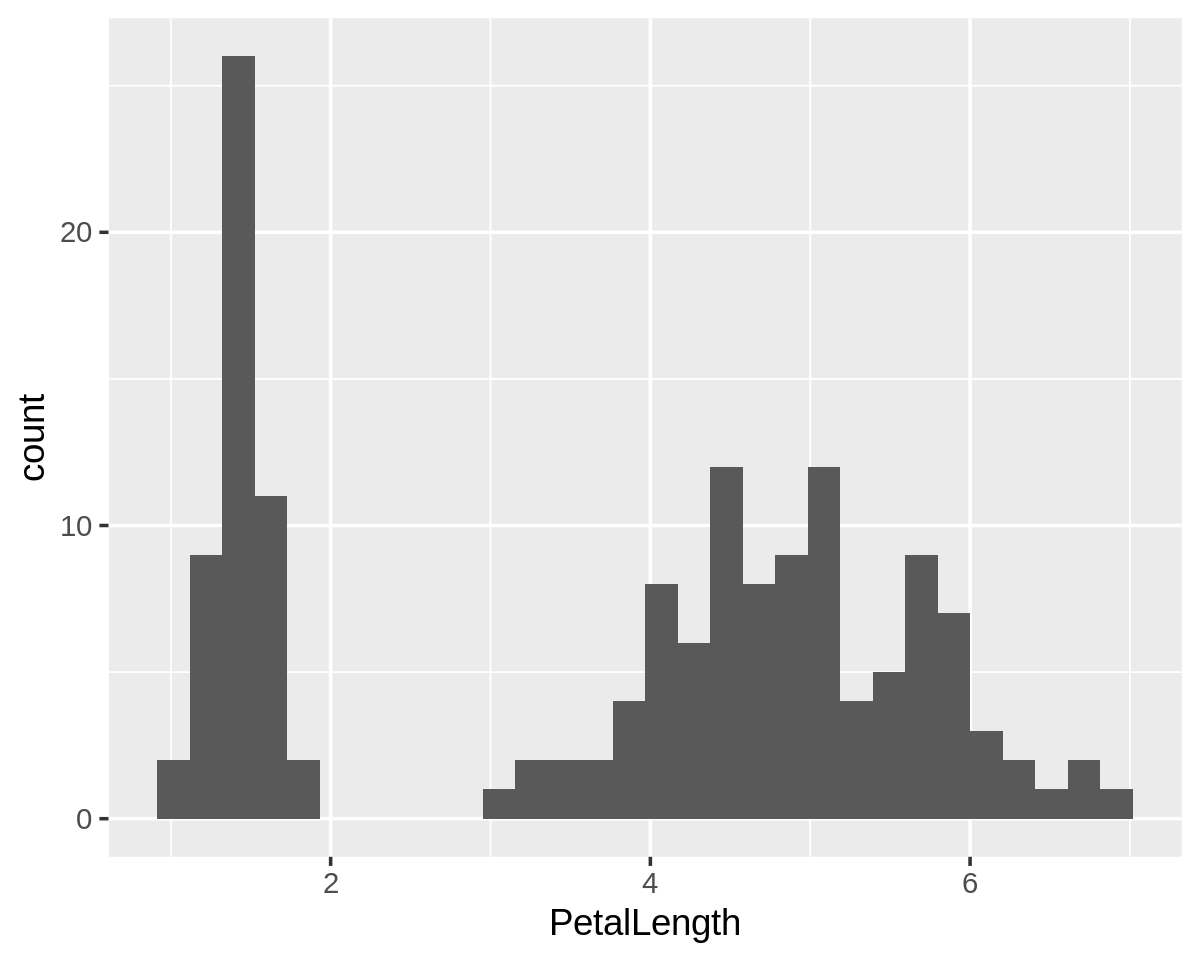

In [24]:
ggplot2::ggplot(dataframe,aes(x=PetalLength)) +
    ggplot2::geom_histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="ggplot_plus_R" id="TGEN;JR7XrLBEIFe~u;F" x="-49" y="109"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="s$Aa#z^bfxQ]I|$aqxkB"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="k8cxEeQDUlvzny5TMcSa"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R5)9uH[M?{qTsc(g*EC9"><field name="CODE">aes(x=PetalLength)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="?c8)3RrgU,tKM=z(B}3!"><mutation items="0"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data></block></value></block></xml>

This distribution appears to be a mixture of two normal distributions.
As before, we can test this idea by adding color based on species:

- Copy the blocks above and add `fill="Species"` to the aesthetic

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


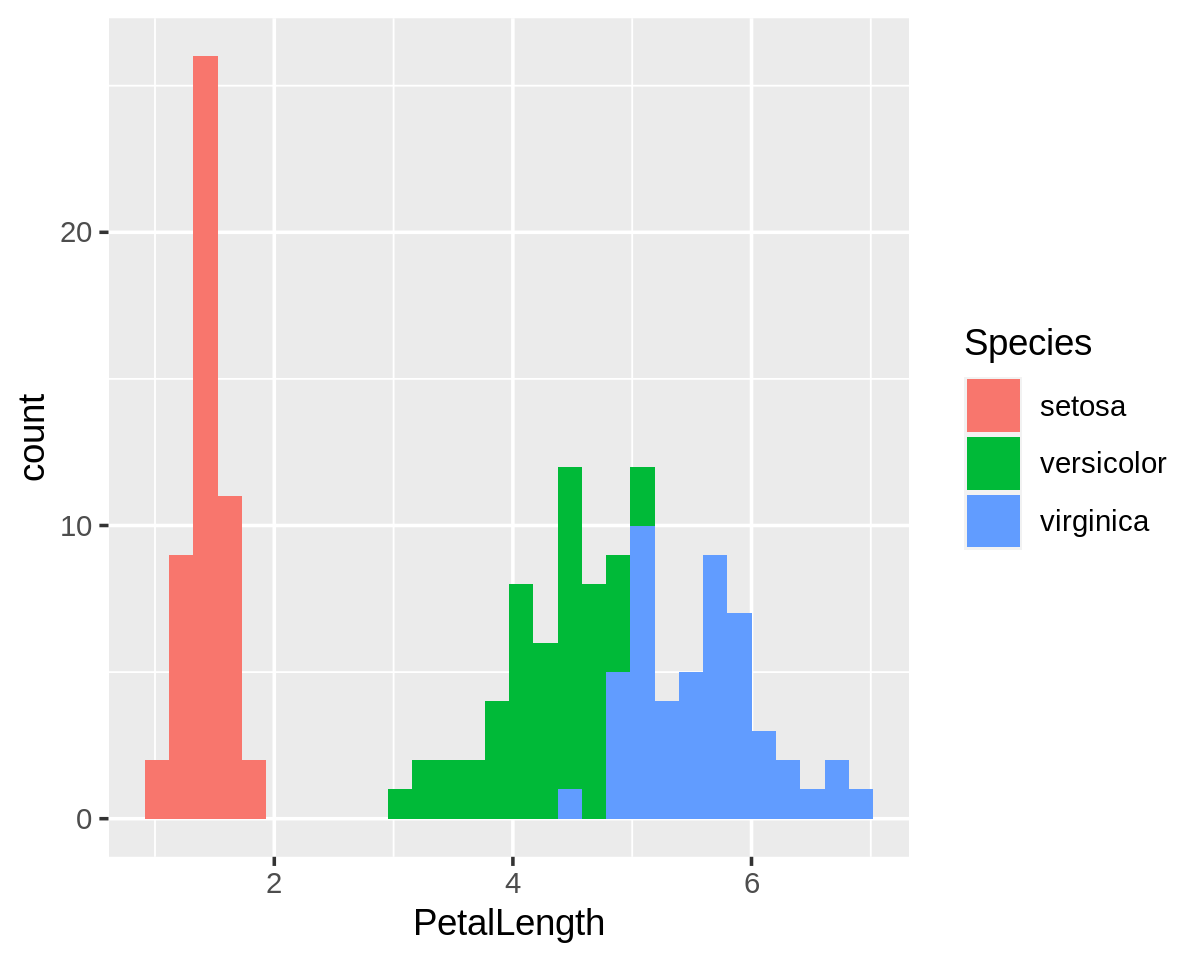

In [25]:
ggplot2::ggplot(dataframe,aes(x=PetalLength,fill=Species)) +
    ggplot2::geom_histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="ggplot_plus_R" id="TGEN;JR7XrLBEIFe~u;F" x="-49" y="109"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="s$Aa#z^bfxQ]I|$aqxkB"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="k8cxEeQDUlvzny5TMcSa"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R5)9uH[M?{qTsc(g*EC9"><field name="CODE">aes(x=PetalLength,fill=Species)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="?c8)3RrgU,tKM=z(B}3!"><mutation items="0"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data></block></value></block></xml>

Now it is clear that there are different distributions related to species.
It is worth noting that when distributions overlap, as they do here, part of the coloring may be obscured by the overlapping color.

Finally, let's look at a simple histogram:

- make plot 
    - `ggplot2` do `ggplot`
        - using `dataframe`
        - and `aes(x=Species)`
    - with 
        - with `ggplot2` do `geom_histogram`     
        - and `bins=10`
        
We set `bins` here to create a coarser histogram.

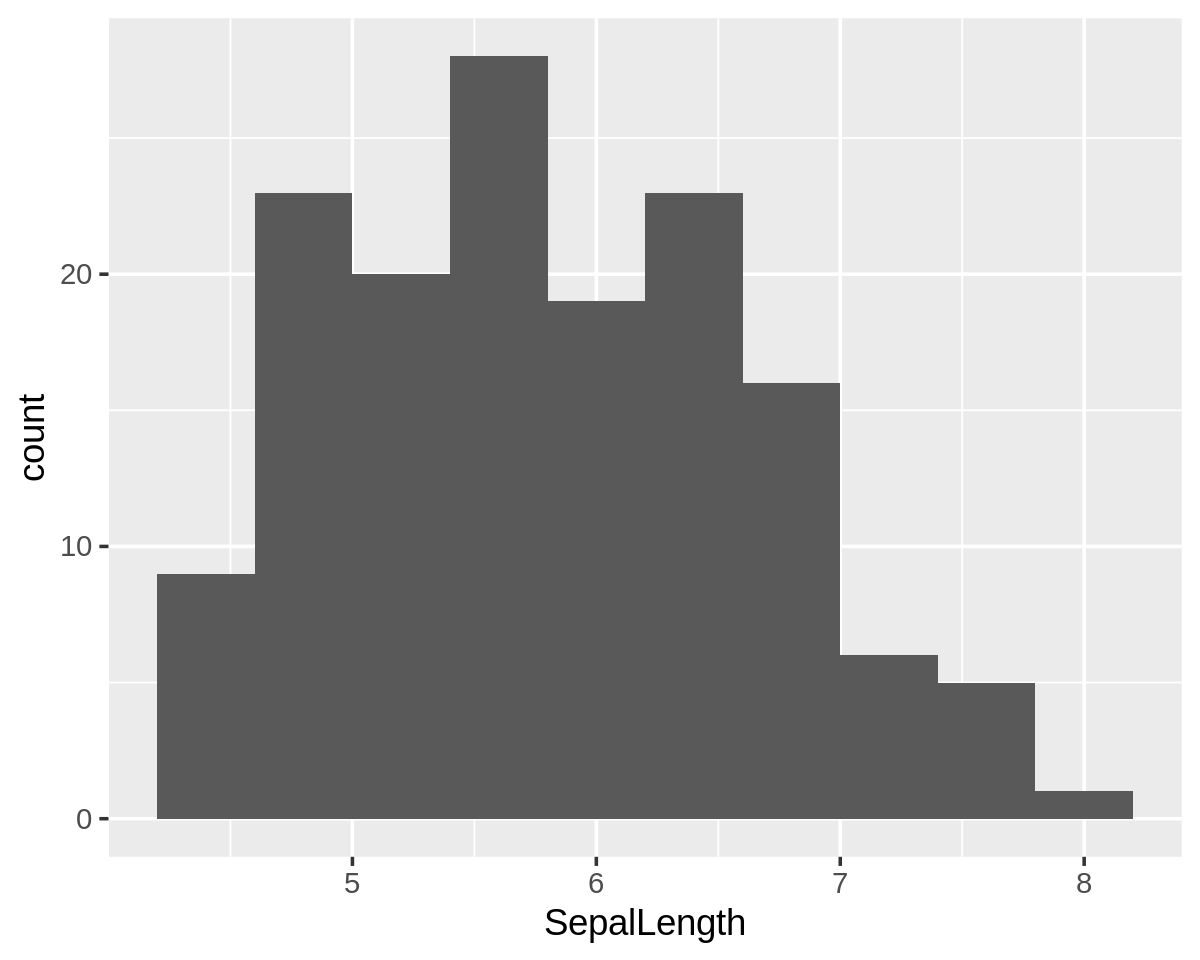

In [26]:
ggplot2::ggplot(dataframe,aes(x=SepalLength)) +
    ggplot2::geom_histogram(bins=10)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="ggplot_plus_R" id="TGEN;JR7XrLBEIFe~u;F" x="-49" y="109"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="s$Aa#z^bfxQ]I|$aqxkB"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="k8cxEeQDUlvzny5TMcSa"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R5)9uH[M?{qTsc(g*EC9"><field name="CODE">aes(x=SepalLength)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="?c8)3RrgU,tKM=z(B}3!"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="ZN.2D*![{DiJ./R8l(UP"><field name="CODE">bins=10</field></block></value></block></value></block></xml>

This distribution appears to be approximately normal, or bell curve shaped.
Not only does it have a clear middle peak, but the distribution is basically symmetric.

Let's pause for a moment and discusss something about histograms using numeric values: the counts are "binned" rather than exact counts.

If you change the `bin` parameter in the last cell, you'll get somewhat different shapes.
Using bins in this way **smooths** histograms, which would otherwise have a jagged appearance for small datasets. 
In most cases, the bin width provided by `ggplot` is reasonable, but you should be aware that very wide bins can distort distributions, e.g. make mixed distributions look normal.

## Recap: Plotting

There are many types of plots, and which you should choose depends on the variables you want to visualize as well as the purpose of your visualization:

- Scatterplots are the only plot we covered that show individual data points. However they require x and y to be numeric
- Bar plots show a single value for each x, typically an average or other summary value
- Line plots are like bar plots but have an advantage for showing multiple lines at once
- Histograms are the only plot we covered that uses a single variable. Histograms show the distribution of a variable

An important type of plot, the boxplot, was not discussed here because it requires a foundation in descriptive statistics, which we will cover next.

## Practice

For extended practice, you can try [this notebook](extended-practice/Plotting-PS.ipynb) (will open in a new tab).

# Descriptive statistics

One of the most important components of a data science project is to examine your data using descriptive statistics. 

In the sections that follow you will learn about descriptive statistics and how they can help us learn about our data and what types of analyses may be appropriate.  We will study the following:

- Measures of central tendency
- Measures of dispersion
- Boxplots
- All in one

## Load data

We'll use the `iris` dataset:

| Variable    | Type    | Description           |
|:-------------|:---------|:-----------------------|
| SepalLength | Ratio   | the sepal length (cm) |
| SepalWidth  | Ratio   | the sepal width (cm)  |
| PetalLength | Ratio   | the petal length (cm) |
| PetalWidth  | Ratio   | the petal width (cm)  |
| Species     | Nominal | the flower species    |

<div style="text-align:center;font-size: smaller">
 <b>Source:</b> This dataset was taken from the <a href="https://archive.ics.uci.edu/ml/datasets/iris">UCI Machine Learning Repository library
    </a></div>
<br>

**If you already have `iris` loaded, you can skip these steps.**

Let's start by importing `readr`:

- `library readr`

In [27]:
library(readr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(cA1)X2lCPQio$W{:j4y">readr</variable></variables><block type="import_R" id="Gv_0#Q!yW+GN:NDyn9P/" x="16" y="10"><field name="libraryName" id="(cA1)X2lCPQio$W{:j4y">readr</field></block></xml>

Now let's load a dataset into a dataframe:

- Set `dataframe` to with `readr` do `read_csv` using \"datasets/iris.csv"`
- Display `dataframe`

In [28]:
dataframe = readr::read_csv("datasets/iris.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable><variable id="(cA1)X2lCPQio$W{:j4y">readr</variable></variables><block type="variables_set" id="aEmL:SB)NF-^e4,:*KEN" x="17" y="204"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id="!AFB9x,(K:Q.,_2FYY+u"><mutation items="1"></mutation><field name="VAR" id="(cA1)X2lCPQio$W{:j4y">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="]^)Tk(d-R3[)=xBi|9=?"><field name="TEXT">datasets/iris.csv</field></block></value></block></value></block><block type="variables_get" id="3?lrwsCvbw.I,.6Ab_k/" x="13" y="283"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></xml>

Rows: 150 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Species
dbl (4): SepalLength, SepalWidth, PetalLength, PetalWidth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SepalLength,SepalWidth,PetalLength,PetalWidth,Species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
⋮,⋮,⋮,⋮,⋮
6.8,3.2,5.9,2.3,virginica


Now we're ready to calculate the measures of central tendency.

## Measures of Central Tendency

The measures of central tendency most commonly used to describe data are **mean, median and mode**. 

We'll show some common ways of calculating mean and median before showing a better way.

A common way of calculating mean and median is to use the functions in `base`, `stats`, and `modeest`:

So let's import them:

- `library base`
- `library stats`
- `library modeest`

In [42]:
library(base)
library(stats)
library(modeest)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="KTq2%HGYa?|Nv^@-_44v">base</variable><variable id="Dr;}Vt043gx+{_wQ(P]U">stats</variable><variable id="GX/Uo@ZFZu^h,-ci@W#@">modeest</variable></variables><block type="import_R" id="4ScBl!UpXO%PKNZs$(Iv" x="-225" y="10"><field name="libraryName" id="KTq2%HGYa?|Nv^@-_44v">base</field><next><block type="import_R" id=":[T#QsTipU;@AGE(s||3"><field name="libraryName" id="Dr;}Vt043gx+{_wQ(P]U">stats</field><next><block type="import_R" id=":_9RIX#W19d`K32xwoQ!"><field name="libraryName" id="GX/Uo@ZFZu^h,-ci@W#@">modeest</field></block></next></block></next></block></xml>

### Mean

The **mean** is the numerical average of the variables. 
Let Let $X_1, X_2, \ldots, X_n$ represent the data;
then the mean is found as $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i.$

`mean` will do this calculation for you, but you have to tell it what column to use:

- with `base` do `mean` 
    - using `dataframe[["SepalLength"]]`

For `dataframe[[]]` using this block in LISTS:

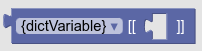

In [38]:
base::mean(dataframe[["SepalLength"]])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="KTq2%HGYa?|Nv^@-_44v">base</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varDoMethod_R" id="N$xsaIELt8Qeqc1Jpg+l" x="-231" y="222"><mutation items="1"></mutation><field name="VAR" id="KTq2%HGYa?|Nv^@-_44v">base</field><field name="MEMBER">mean</field><data>base:mean</data><value name="ADD0"><block type="doubleIndexer_R" id="iKbps)UAcGKyz3iT:Gjx"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><value name="INDEX"><block type="text" id="Di^k^pqM9=|:0`*{[wH@"><field name="TEXT">SepalLength</field></block></value></block></value></block></xml>

[1] 5.843333

### Median
The **median** is the number in the middle of the data. 
By definition, one half of the data points are below the median and one half are above. 

We can calculate the median just like the mean.
Copy the blocks above and replace `base` with `stats` and `mean` with `median`.

In [39]:
stats::median(dataframe[["SepalLength"]])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Dr;}Vt043gx+{_wQ(P]U">stats</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varDoMethod_R" id="N$xsaIELt8Qeqc1Jpg+l" x="-231" y="222"><mutation items="1"></mutation><field name="VAR" id="Dr;}Vt043gx+{_wQ(P]U">stats</field><field name="MEMBER">median</field><data>stats:median</data><value name="ADD0"><block type="doubleIndexer_R" id="iKbps)UAcGKyz3iT:Gjx"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><value name="INDEX"><block type="text" id="Di^k^pqM9=|:0`*{[wH@"><field name="TEXT">SepalLength</field></block></value></block></value></block></xml>

[1] 5.8

Notice that the mean and the median are almost the same for `SepalLength`.
What do you think that means?

### Mode

The **mode** is the value in the data that shows up the most often.

Now you can copy the code above and use `modeest` and the function `mlv`.

In [45]:
modeest::mlv(dataframe[["SepalLength"]])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="GX/Uo@ZFZu^h,-ci@W#@">modeest</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varDoMethod_R" id="N$xsaIELt8Qeqc1Jpg+l" x="-231" y="222"><mutation items="1"></mutation><field name="VAR" id="GX/Uo@ZFZu^h,-ci@W#@">modeest</field><field name="MEMBER">mlv</field><data>modeest:mlv</data><value name="ADD0"><block type="doubleIndexer_R" id="iKbps)UAcGKyz3iT:Gjx"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field><value name="INDEX"><block type="text" id="Di^k^pqM9=|:0`*{[wH@"><field name="TEXT">SepalLength</field></block></value></block></value></block></xml>

Warning message:
“argument 'method' is missing. Data are supposed to be continuous. 
            Default method 'shorth' is used”
Warning message:
“encountered a tie, and the difference between minimal and 
                   maximal value is > length('x') * 'tie.limit'
the distribution could be multimodal”


[1] 5.605333

### What measure to use

The type of variable determines the measures of central tendency that are valid.

In the table below, X indicates where a variable type and a measure of central tendency can be used together.

|          | mode | median | mean |
|----------|------|--------|------|
| nominal  | X    |        |      |
| ordinal  | X    | X      |      |
| interval | X    | X      | X    |
| ratio    | X    | X      | X    |

## Measures of Dispersion (spread)

Even when two different variables have similar means (or medians, or modes) they can still be quite different depending on how the data are spread out around the center. 
In Figure 1 below both distributions have the same mean (0) but different spreads. 
The red curve has most of its points close to the center while the blue curve has points spread further from the mean.


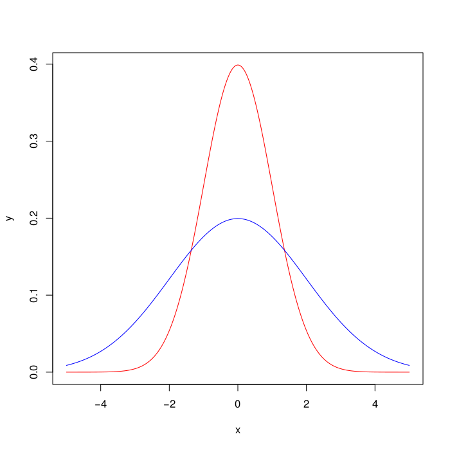

**Figure 1:** Two distributions with the same center but different
spread

One measure of dispersion that can be used with ordered categorical data (ordinal level) or numerical data (interval/ratio level) is the **five number summary**.
The five number summary is useful for comparing the center and spread of multiple variables. 
You use the numbers in the five number summary to construct a box and whiskers plot. 
The five numbers are: 

- minimum
- first quartile
- median
- third quartile
- maximum

The first quartile is the median of the values below the median and the third quartile is the median of the
values above the median.

To use a football analogy, quartiles are like the 4 quarters in a game, and the median is like halftime.

We can get the five number summary easily with the `base` R package function `summary`:

- with `base` do `summary` using `dataframe`

In [47]:
base::summary(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="KTq2%HGYa?|Nv^@-_44v">base</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varDoMethod_R" id="vrCkTt*#!4Y@Yg!9;o6:" x="-233" y="176"><mutation items="1"></mutation><field name="VAR" id="KTq2%HGYa?|Nv^@-_44v">base</field><field name="MEMBER">summary</field><data>base:summary</data><value name="ADD0"><block type="variables_get" id="TW/m4MUm`m7Zop0Ia?2_"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value></block></xml>

  SepalLength      SepalWidth     PetalLength      PetalWidth   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   Species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

A five number summary is returned for every numeric variable.

<details>
    <summary>Basics: Other measures of spread</summary>
    
Other measures of the spread for numerical data include the range, the interquartile range, and the variance. 

The **range** is simply the maximum value minus the minimum. 
When outliers are present they may inflate the range. 
For example in our income example the range would be $4000000-30000=3,970,000$ which is not representative of the spread of the majority of incomes. 

To reduce the effect of outliers on the measure of dispersion, the interquartile range is often used. 
The **interquartile range** is defined as the third quartile minus the first quartile.

The most commonly used measures of dispersion for numerical data are the **variance** and its square root, the **standard deviation**. 
The variance measures the sum of squared differences of the data about the mean.
Squaring the differences may seem complicated but makes sense when you realize that the sum of differences about the mean is zero.

Again, let $X_1, X_2, \ldots, X_n$ be the variables you want to compute the variance of. 
The formula for the variance is given by $S^2 = \frac{\sum_{i=1}^n (X_i  - \bar{X})^2}{n-1}.$ 
The standard deviation is the square root of the variance.
</details>

## Boxplots

Boxplots are aligned with the five number summary: 

- The box top/bottom mark the 1st and 3rd quartiles
- The line in the box marks the median
- The whiskers typically mark the most extreme data point within 1.5 times the interquartile range (the difference between 1st and third quartiles)
- Outliers are dots outside the box

Let's make a boxplot:

- make plot 
    - `ggplot2` do `ggplot`
        - using `dataframe`
        - and `aes(x=PetalLength)`
    - with 
        - with `ggplot2` do `geom_boxplot`      

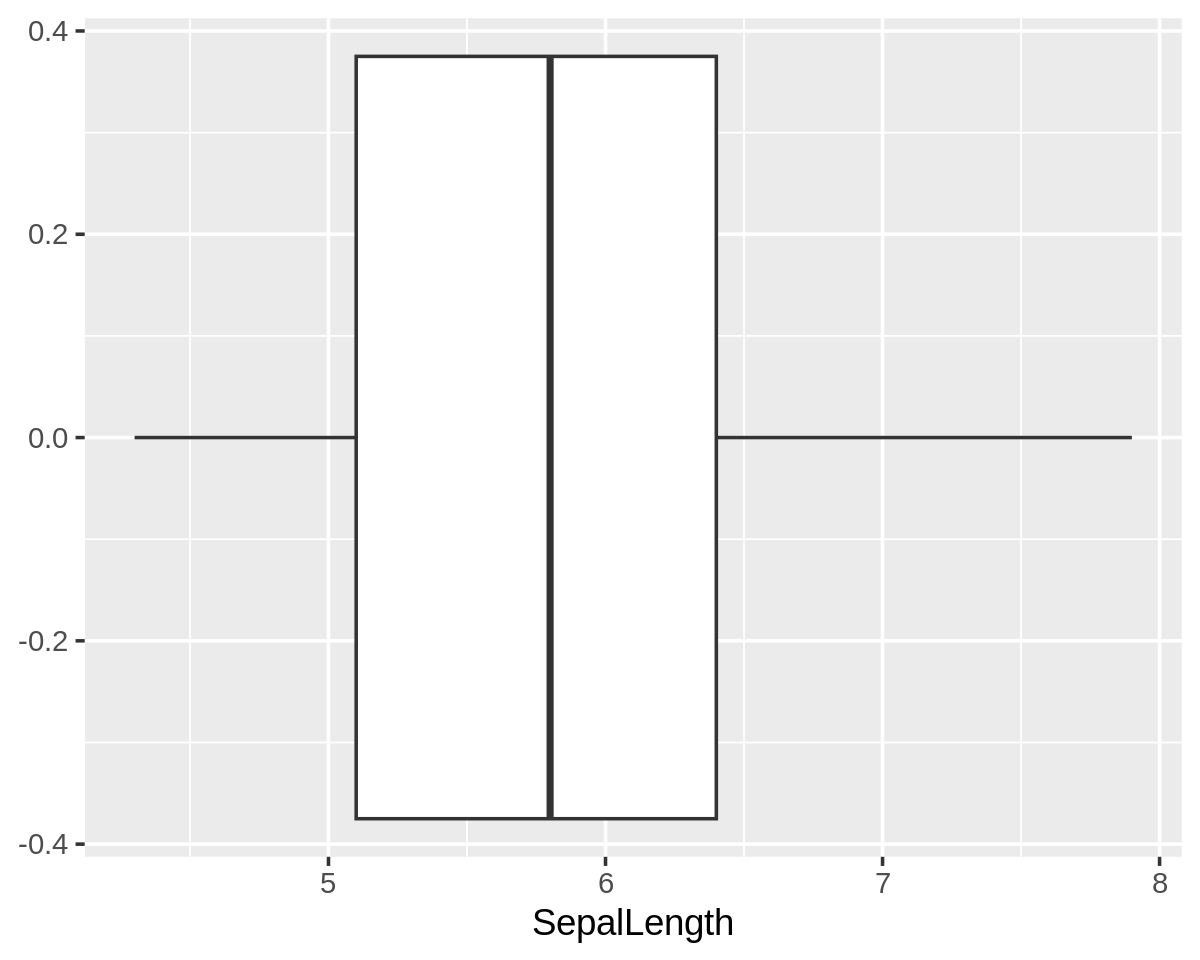

In [49]:
ggplot2::ggplot(dataframe,aes(x=PetalLength)) +
    ggplot2::geom_boxplot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="ggplot_plus_R" id="TGEN;JR7XrLBEIFe~u;F" x="-49" y="109"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="s$Aa#z^bfxQ]I|$aqxkB"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="k8cxEeQDUlvzny5TMcSa"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R5)9uH[M?{qTsc(g*EC9"><field name="CODE">aes(x=PetalLength)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="?c8)3RrgU,tKM=z(B}3!"><mutation items="0"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_boxplot</field><data>ggplot2:geom_boxplot</data></block></value></block></xml>

In this case, there are no outliers. 

## All-in-one

While the above methods are commonly used in R, some libraries have created all in one functions that calculate a variety of descriptive statistics all at once.

A useful example is `describe` from the `psych` package.
Let's load `psych`

- `library psych`

In [50]:
library(psych)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="H.f.@`@DGJUVVIS~m[q!">psych</variable></variables><block type="import_R" id="oX%bwalCDmI~h|,K9x5A" x="-38" y="10"><field name="libraryName" id="H.f.@`@DGJUVVIS~m[q!">psych</field></block></xml>

Registered S3 method overwritten by 'psych':
  method         from  
  plot.residuals rmutil


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




And use `describe` to get descriptive statistics:

- with `psych` do `describe`
    - using `dataframe`

In [52]:
psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="H.f.@`@DGJUVVIS~m[q!">psych</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varDoMethod_R" id="-lQX7x`bh?otr@/B6+no" x="-36" y="212"><mutation items="1"></mutation><field name="VAR" id="H.f.@`@DGJUVVIS~m[q!">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="`a)ct@JE/VBGjptu|P;t"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SepalLength,1,150,5.843333,0.8280661,5.80,5.808333,1.03782,4.3,7.9,3.6,0.3086407,-0.6058125,0.06761132
SepalWidth,2,150,3.054000,0.4335943,3.00,3.039167,0.37065,2.0,4.4,2.4,0.3274013,0.1983681,0.03540283
PetalLength,3,150,3.758667,1.7644204,4.35,3.760833,1.85325,1.0,6.9,5.9,-0.2689994,-1.4166832,0.14406432
PetalWidth,4,150,1.198667,0.7631607,1.30,1.184167,1.03782,0.1,2.5,2.4,-0.1029060,-1.3573684,0.06231181
Species*,5,150,2.000000,0.8192319,2.00,2.000000,1.48260,1.0,3.0,2.0,0.0000000,-1.5199333,0.06689001


As you can see, this returns everything we've talked about and more, *except* mode and the quartiles.

A variant of `describe` will give descriptive statistics by group, which is useful if we want descriptives for each `Species`:

- with `psych` do `describeBy`
    - using `dataframe`
    - and `Species`

In [57]:
psych::describeBy(dataframe,"Species")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="H.f.@`@DGJUVVIS~m[q!">psych</variable><variable id="t[n^Fcp7,s93E17ZZ9J6">dataframe</variable></variables><block type="varDoMethod_R" id="-lQX7x`bh?otr@/B6+no" x="-36" y="212"><mutation items="2"></mutation><field name="VAR" id="H.f.@`@DGJUVVIS~m[q!">psych</field><field name="MEMBER">describeBy</field><data>psych:describeBy</data><value name="ADD0"><block type="variables_get" id="`a)ct@JE/VBGjptu|P;t"><field name="VAR" id="t[n^Fcp7,s93E17ZZ9J6">dataframe</field></block></value><value name="ADD1"><block type="text" id="($?splWlG49_P(THfoe+"><field name="TEXT">Species</field></block></value></block></xml>


 Descriptive statistics by group 
Species: setosa
            vars  n mean   sd median trimmed  mad min max range skew kurtosis
SepalLength    1 50 5.01 0.35    5.0    5.00 0.30 4.3 5.8   1.5 0.11    -0.45
SepalWidth     2 50 3.42 0.38    3.4    3.40 0.44 2.3 4.4   2.1 0.10     0.54
PetalLength    3 50 1.46 0.17    1.5    1.46 0.15 1.0 1.9   0.9 0.07     0.66
PetalWidth     4 50 0.24 0.11    0.2    0.24 0.00 0.1 0.6   0.5 1.13     1.13
Species*       5 50 1.00 0.00    1.0    1.00 0.00 1.0 1.0   0.0  NaN      NaN
              se
SepalLength 0.05
SepalWidth  0.05
PetalLength 0.02
PetalWidth  0.02
Species*    0.00
------------------------------------------------------------ 
Species: versicolor
            vars  n mean   sd median trimmed  mad min max range  skew kurtosis
SepalLength    1 50 5.94 0.52   5.90    5.94 0.52 4.9 7.0   2.1  0.10    -0.69
SepalWidth     2 50 2.77 0.31   2.80    2.78 0.30 2.0 3.4   1.4 -0.34    -0.55
PetalLength    3 50 4.26 0.47   4.35    4.29 0.52 3.0 5.1   

---------------------------

Great meeting just now 😄 Following up, here are the links we looked at:

1. Basic R

- A basic intro to the interface (they will use our server so don't need to install software) ~ 20 minutes

- Loading data, tabular data, rows/columns ~ 30 minutes


https://github.com/memphis-iis/datawhys-content-notebooks-r/blob/3a35228bbbf394f8164dfce2d54c628c9430b0fe//Data-science-and-the-nature-of-data.ipynb

- Plotting data, scatter/bar/line/histograms ~ 40 minutes

https://github.com/memphis-iis/datawhys-content-notebooks-r/blob/3a35228bbbf394f8164dfce2d54c628c9430b0fe//Plotting.ipynb

- Descriptive statistics, mean/median/mode/quartiles ~ 30 minutes

https://github.com/memphis-iis/datawhys-content-notebooks-r/blob/3a35228bbbf394f8164dfce2d54c628c9430b0fe//Descriptive-statistics.ipynb

- Measures of association, correlation, piping, correlation matrix, contingency table, chisquare ~ 40 minutes

*I think that's about 3 hours. For some notebooks, we either need to trim text or tell them to ignore the didactic text, which we will replace with mini overview/lectures during the workshop. Note that each of the above notebooks also has a problem solving notebook we can draw on for more material if needed. These first four notebooks heavily use the iris dataset.* 